In [157]:
import pandas as pd
import numpy as np
from collections import Counter
import time
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns


In [158]:
data = pd.read_excel('marketing_customer_analysis.xlsx')
data = data.drop(['Unnamed: 0'],axis=1)

data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [159]:
# 1. Show the dataframe shape.

data.shape

(10910, 25)

In [160]:
# 2. Standardize header names.
    # Don't need to change anything

data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [161]:
# 3. Which columns are numerical?

numerical_cols = data.select_dtypes(include=['int', 'float']).columns.tolist()
display(numerical_cols)



['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [162]:
# 4. Which columns are categorical?

categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
display(categorical_cols)

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Vehicle Type']

In [163]:
#5. Check and deal with `NaN` values.

data.isna().sum()

Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [164]:
data['State'].value_counts(dropna=False)


California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
NaN            631
Name: State, dtype: int64

In [165]:
# Decided to change NaN values to Unkown in order to don't influence States Ranking

data['State'] = data['State'].fillna('Unknown')
data['State'].value_counts(dropna=False)


California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Unknown        631
Name: State, dtype: int64

In [166]:

data['Response'].value_counts(dropna=False)


No     8813
Yes    1466
NaN     631
Name: Response, dtype: int64

In [167]:
# Decided to change NaN values to No as the common trend 

data['Response'] = data['Response'].fillna('No')
data['Response'].value_counts(dropna=False)


No     9444
Yes    1466
Name: Response, dtype: int64

In [168]:
data['Months Since Last Claim'].value_counts(dropna=False)


NaN     633
3.0     426
6.0     394
1.0     386
7.0     378
4.0     373
2.0     368
5.0     355
0.0     354
10.0    346
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    307
17.0    299
14.0    299
9.0     277
19.0    276
23.0    276
25.0    269
21.0    267
18.0    257
20.0    254
22.0    246
24.0    237
29.0    234
28.0    227
31.0    221
26.0    211
27.0    208
30.0    201
34.0    199
33.0    198
35.0    157
32.0    155
Name: Months Since Last Claim, dtype: int64

In [169]:
# Decided to change NaN values to the median as the range it's big 

data['Months Since Last Claim'] = data['Months Since Last Claim'].fillna(data['Months Since Last Claim'].median())

data['Months Since Last Claim'].value_counts(dropna=False)



14.0    932
3.0     426
6.0     394
1.0     386
7.0     378
4.0     373
2.0     368
5.0     355
0.0     354
10.0    346
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    307
17.0    299
9.0     277
23.0    276
19.0    276
25.0    269
21.0    267
18.0    257
20.0    254
22.0    246
24.0    237
29.0    234
28.0    227
31.0    221
26.0    211
27.0    208
30.0    201
34.0    199
33.0    198
35.0    157
32.0    155
Name: Months Since Last Claim, dtype: int64

In [170]:
data['Number of Open Complaints'].value_counts(dropna=False)


0.0    8160
1.0    1145
NaN     633
2.0     414
3.0     324
4.0     166
5.0      68
Name: Number of Open Complaints, dtype: int64

In [171]:

data['Number of Open Complaints'] = data['Number of Open Complaints'].fillna(data['Number of Open Complaints'].median())

data['Number of Open Complaints'].value_counts(dropna=False)


0.0    8793
1.0    1145
2.0     414
3.0     324
4.0     166
5.0      68
Name: Number of Open Complaints, dtype: int64

In [172]:
data['Vehicle Class'].value_counts(dropna=False)


Four-Door Car    5212
Two-Door Car     2118
SUV              2012
NaN               622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: Vehicle Class, dtype: int64

In [173]:

data['Vehicle Class'] = data['Vehicle Class'].fillna('Four-Door Car')
data['Vehicle Class'].value_counts(dropna=False)


Four-Door Car    5834
Two-Door Car     2118
SUV              2012
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: Vehicle Class, dtype: int64

In [174]:
data['Vehicle Size'].value_counts(dropna=False)


Medsize    7251
Small      1966
Large      1071
NaN         622
Name: Vehicle Size, dtype: int64

In [175]:
data['Vehicle Size'] = data['Vehicle Size'].fillna('Medsize')
data['Vehicle Size'].value_counts(dropna=False)


Medsize    7873
Small      1966
Large      1071
Name: Vehicle Size, dtype: int64

In [176]:
data['Vehicle Type'].value_counts(dropna=False)


NaN    5482
A      5428
Name: Vehicle Type, dtype: int64

In [177]:
data['Vehicle Type'] = data['Vehicle Type'].fillna('M')
data['Vehicle Type'].value_counts(dropna=False)


M    5482
A    5428
Name: Vehicle Type, dtype: int64

In [178]:
# 6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. _Hint_: If data from March does not exist, consider only January and February.
# added a column indicating numerical month
data['month'] = pd.DatetimeIndex(data['Effective To Date']).month
data['month'].unique()

array([2, 1])

In [179]:
data[data['month']<4]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


# Round 3 starts:

In [90]:
#Show DataFrame info.

display(data.head())
display(data.tail())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,month
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2
10909,IV32877,Unknown,6857.519928,No,Basic,Bachelor,2011-01-08,Unemployed,M,0,...,3,Personal Auto,Personal L1,Offer4,Web,1021.719397,SUV,Medsize,M,1


In [91]:
# Describe DataFrame.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
Income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
Monthly Premium Auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,10910.0,15.082401,9.787208,0.000000,7.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,10910.0,0.361962,0.890134,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
month,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000


In [92]:
# Describe DataFrame.

data.describe(include=[np.object]).T

/var/folders/0r/l856hq9x61zf5p8g8vxjs_dh0000gn/T/ipykernel_5909/1368301106.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include=[np.object]).T


,count,unique,top,freq
Customer,10910,9134,ID89933,7
State,10910,6,California,3552
Response,10910,2,No,9444
Coverage,10910,3,Basic,6660
Education,10910,5,Bachelor,3272
EmploymentStatus,10910,5,Employed,6789
Gender,10910,2,F,5573
Location Code,10910,3,Suburban,6902
Marital Status,10910,3,Married,6319
Policy Type,10910,3,Personal Auto,8128


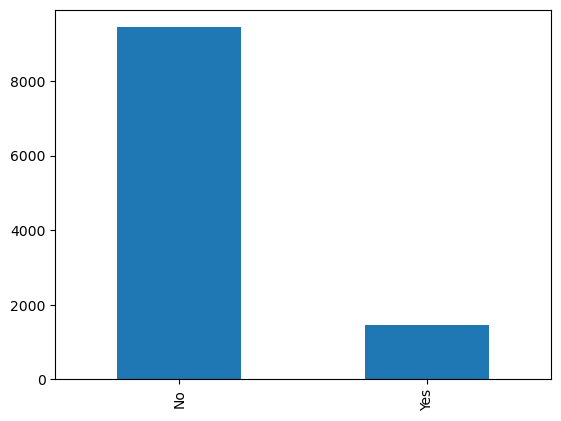

In [93]:
# Show a plot of the total number of responses.

data.Response.value_counts().plot.bar()
plt.show()


In [94]:
# Show a plot of the response rate by the sales channel.
# Converted the response in 1 or 0 in order to build the response rate counting 0/1

data['response_rate'] = np.where(data['Response']=='Yes' , 1, 0) 
data['response_rate']

0        0
1        0
2        0
3        1
4        0
        ..
10905    0
10906    0
10907    0
10908    0
10909    0
Name: response_rate, Length: 10910, dtype: int64

In [95]:
data['response_rate'].value_counts()

0    9444
1    1466
Name: response_rate, dtype: int64

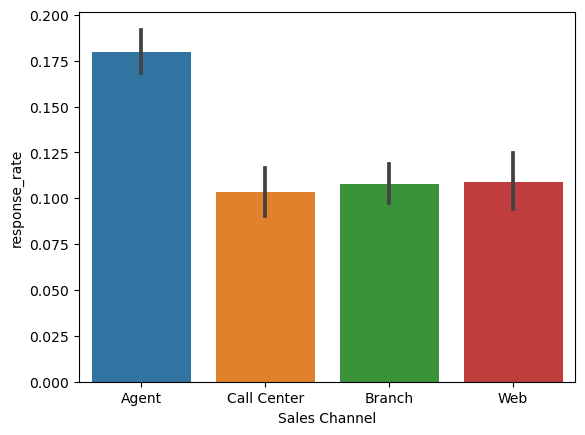

In [96]:
sns.barplot(x="Sales Channel", y="response_rate", data=data)
plt.show()

In [97]:
# Show a plot of the response rate by the total claim amount.

data['Total Claim Amount'].describe()

count    10910.000000
mean       434.888330
std        292.180556
min          0.099007
25%        271.082527
50%        382.564630
75%        547.200000
max       2893.239678
Name: Total Claim Amount, dtype: float64

In [98]:
#Define ranges

cut_labels_5 = ['0-500', '500-1000', '1000-1500', '1500-2000', '>2000']

In [99]:
#Create a new column with Total Claim Amount Ranges

bin1 = pd.cut(data['Total Claim Amount'], labels=cut_labels_5, bins=5)
data['Total Claim Amount Range'] = bin1
display(data.head())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,month,response_rate,Total Claim Amount Range
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2,0,0-500
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1,0,500-1000
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,0,0-500
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,1,0-500
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1,0,500-1000


In [100]:
bin1

0            0-500
1         500-1000
2            0-500
3            0-500
4         500-1000
           ...    
10905    1000-1500
10906        0-500
10907        0-500
10908     500-1000
10909     500-1000
Name: Total Claim Amount, Length: 10910, dtype: category
Categories (5, object): ['0-500' < '500-1000' < '1000-1500' < '1500-2000' < '>2000']

In [101]:
bin1.value_counts()


0-500        8595
500-1000     1997
1000-1500     263
1500-2000      48
>2000           7
Name: Total Claim Amount, dtype: int64

<AxesSubplot:xlabel='Total Claim Amount Range', ylabel='response_rate'>

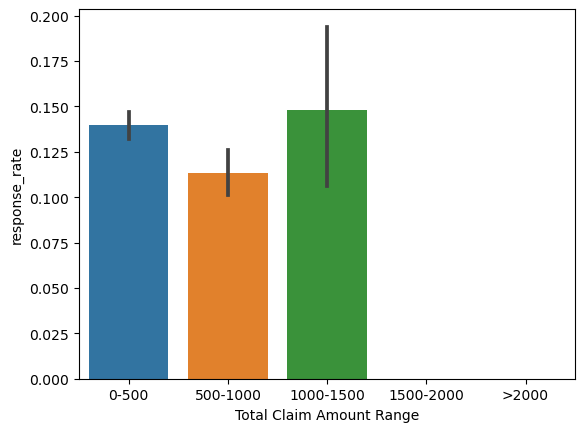

In [102]:
sns.barplot(x="Total Claim Amount Range", y="response_rate", data=data)

<AxesSubplot:xlabel='Income Range', ylabel='response_rate'>

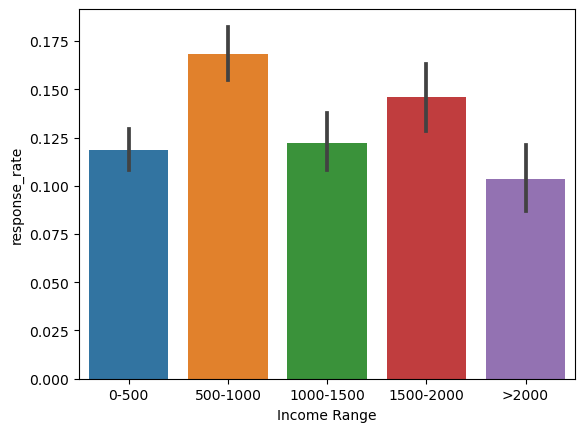

In [103]:
# Show a plot of the response rate by income.

bin2 = pd.cut(data['Income'],labels=cut_labels_5, bins=5)
data['Income Range'] = bin2

sns.barplot(x="Income Range", y="response_rate", data=data)

In [104]:
bin2

0        1000-1500
1            0-500
2         500-1000
3        1000-1500
4         500-1000
           ...    
10905        0-500
10906    1500-2000
10907     500-1000
10908    1500-2000
10909        0-500
Name: Income, Length: 10910, dtype: category
Categories (5, object): ['0-500' < '500-1000' < '1000-1500' < '1500-2000' < '>2000']

# Round 4 starts:


In [105]:
# Check the data types of the columns. 
# Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.

numerical = data.select_dtypes(include=['int', 'float'])
categorical = data.select_dtypes(include=['object'])

display(numerical)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,month,response_rate
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2,0
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1,0
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,0
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1,1
4,9025.067525,23675,117,14.0,31,0.0,7,707.925645,1,0
...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,14.0,40,0.0,7,1214.400000,1,0
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1,0
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2,0
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2,0


In [106]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()

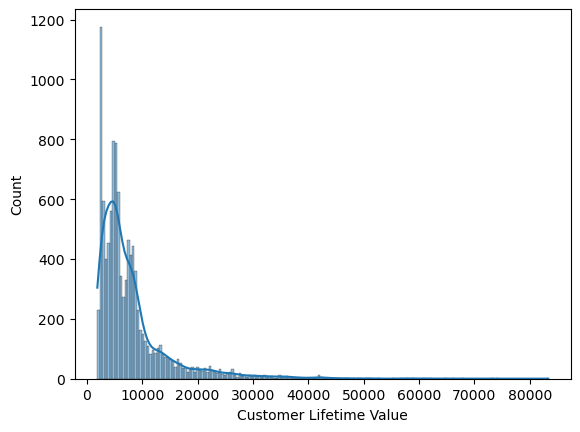

In [107]:
# Use seaborn library to construct distribution plots for the numerical variables
sns.histplot(numerical, x='Customer Lifetime Value', kde= True)

plt.show()

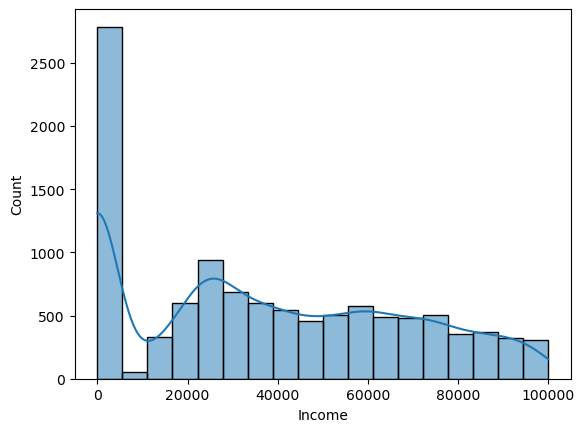

In [108]:
sns.histplot(numerical, x='Income', kde= True)
plt.show()

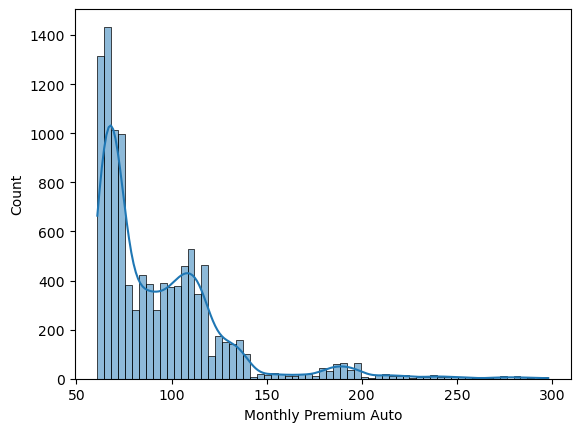

In [109]:
sns.histplot(numerical, x='Monthly Premium Auto', kde= True)
plt.show()

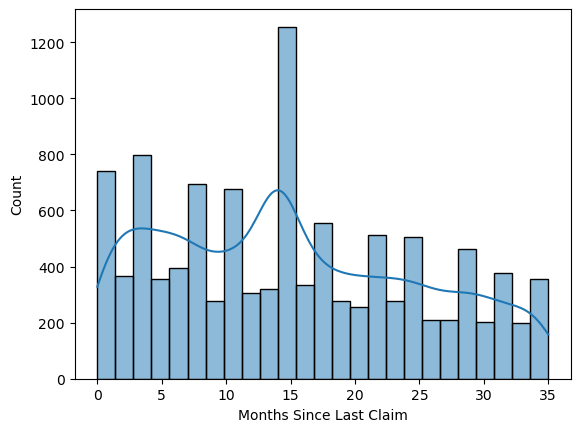

In [110]:
sns.histplot(numerical, x='Months Since Last Claim', kde= True)
plt.show()

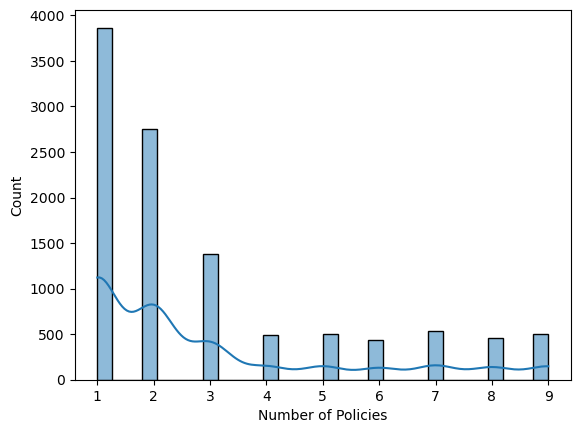

In [111]:
sns.histplot(numerical, x='Number of Policies', kde= True)
plt.show()

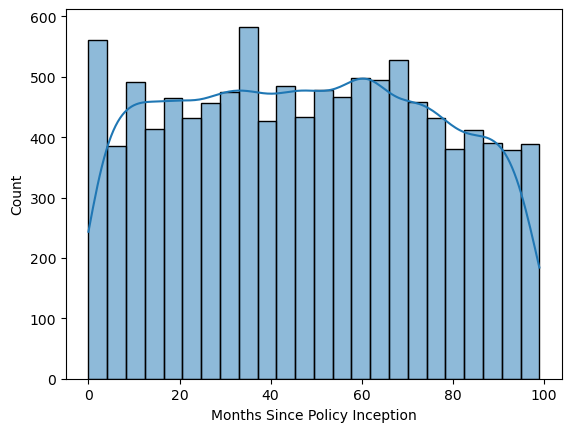

In [112]:
sns.histplot(numerical, x='Months Since Policy Inception', kde= True)
plt.show()

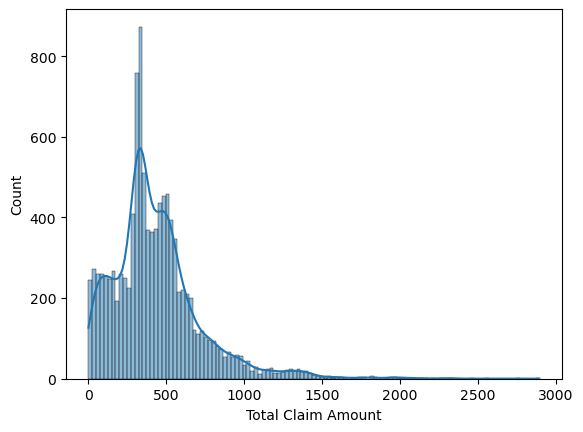

In [113]:
sns.histplot(numerical, x='Total Claim Amount', kde= True)
plt.show()

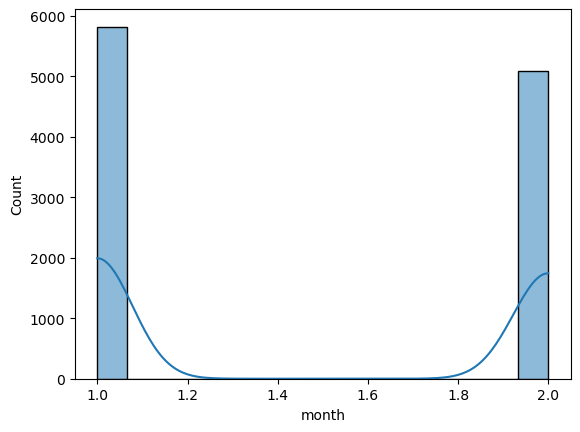

In [114]:
sns.histplot(numerical, x='month', kde= True)
plt.show()

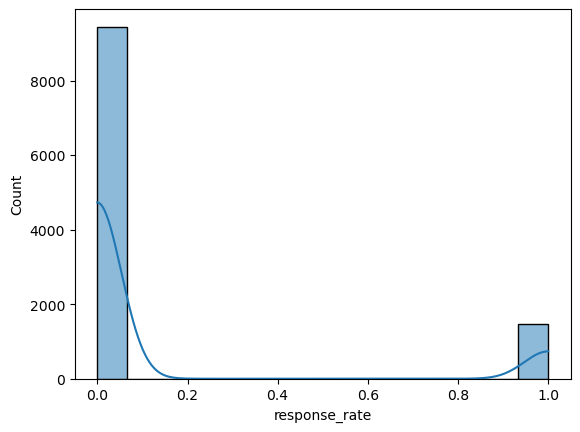

In [115]:
sns.histplot(numerical, x='response_rate', kde= True)
plt.show()


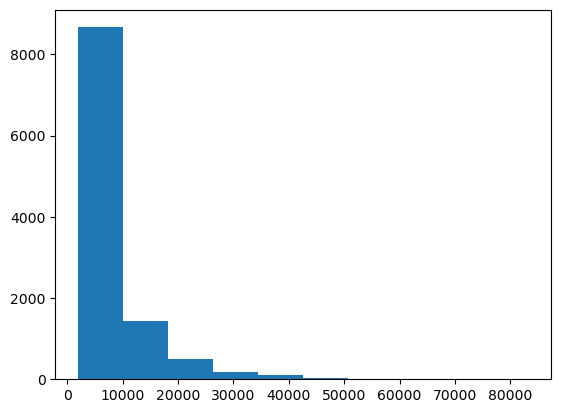

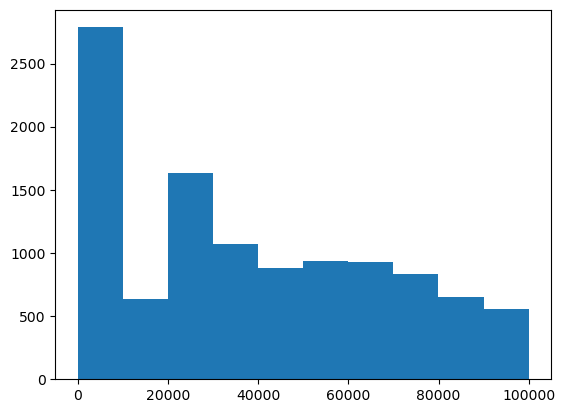

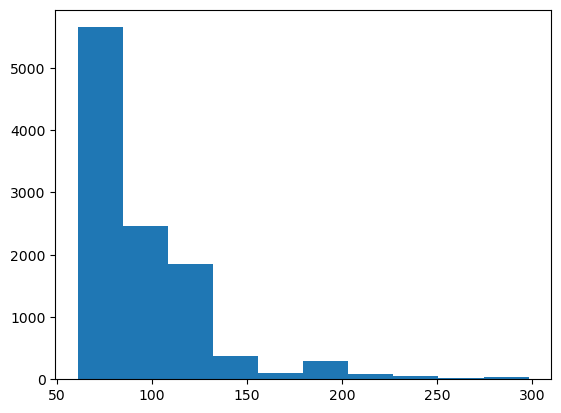

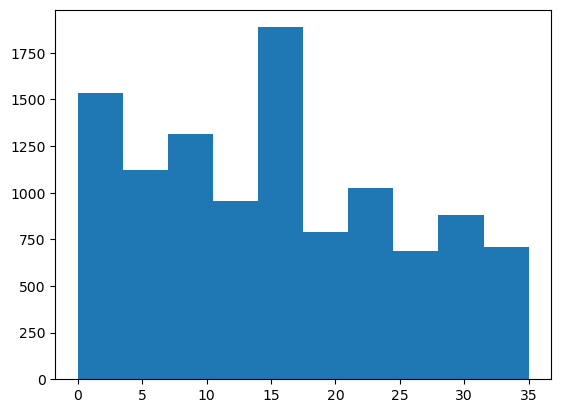

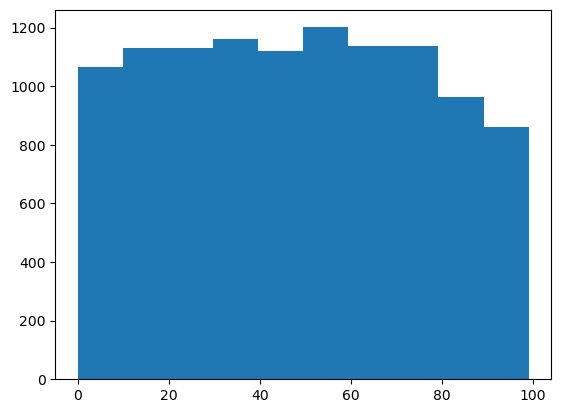

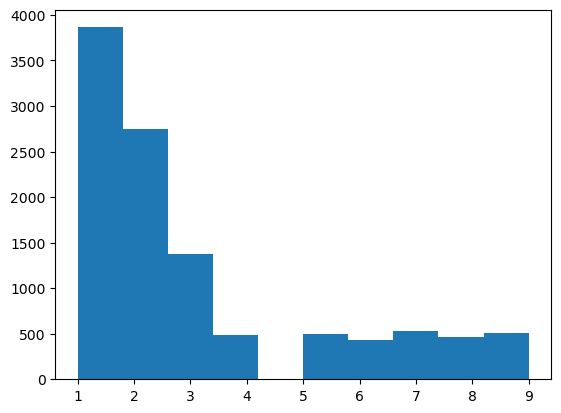

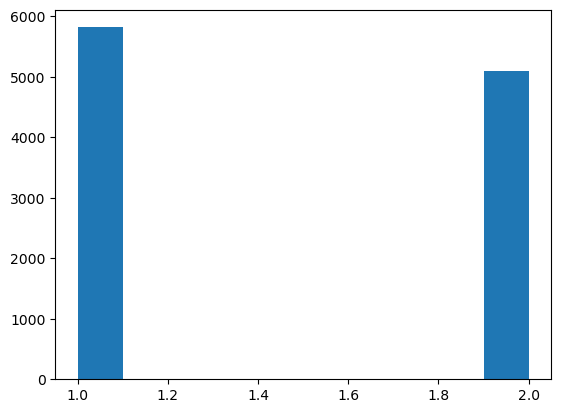

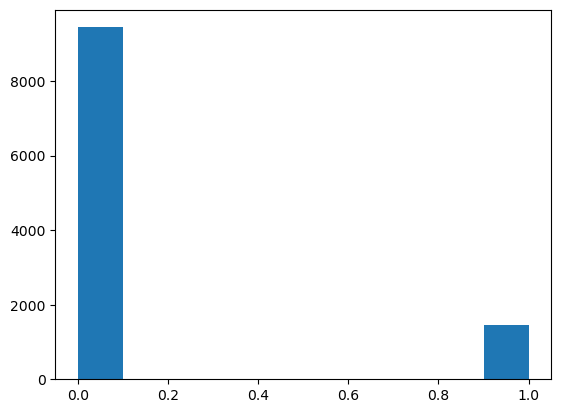

In [116]:
# Use Matplotlib to construct histograms
plt.hist(numerical['Customer Lifetime Value'])
plt.show()
plt.hist(numerical['Income'])
plt.show()
plt.hist(numerical['Monthly Premium Auto'])
plt.show()
plt.hist(numerical['Months Since Last Claim'])
plt.show()
plt.hist(numerical['Months Since Policy Inception'])
plt.show()
plt.hist(numerical['Number of Policies'])
plt.show()
plt.hist(numerical['month'])
plt.show()
plt.hist(numerical['response_rate'])
plt.show()




In [117]:
# Do the distributions for different numerical variables look like a normal distribution

#Most of them don't show normal distribution, the only one is Months Since Policy Inception

In [118]:
# For the numerical variables, check the multicollinearity between the features

#There isn't

In [119]:
# Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features


In [120]:
correlations_matrix = numerical.corr()
correlations_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,month,response_rate
Customer Lifetime Value,1.000000,0.028306,0.403069,0.015874,0.016960,-0.030616,0.016024,0.232626,-0.009234,-0.007765
Income,0.028306,1.000000,-0.009788,-0.022708,-0.005903,0.008425,-0.009960,-0.354141,-0.000443,0.011156
Monthly Premium Auto,0.403069,-0.009788,1.000000,0.008489,0.018953,-0.010059,-0.020505,0.631799,0.007253,0.013918
Months Since Last Claim,0.015874,-0.022708,0.008489,1.000000,-0.038157,0.005004,0.006807,0.012340,-0.019666,-0.015016
Months Since Policy Inception,0.016960,-0.005903,0.018953,-0.038157,1.000000,0.004165,-0.009123,0.003095,0.015163,-0.004875
Number of Open Complaints,-0.030616,0.008425,-0.010059,0.005004,0.004165,1.000000,0.001681,-0.012380,-0.005802,-0.004419
Number of Policies,0.016024,-0.009960,-0.020505,0.006807,-0.009123,0.001681,1.000000,-0.008923,0.005127,-0.018650
Total Claim Amount,0.232626,-0.354141,0.631799,0.012340,0.003095,-0.012380,-0.008923,1.000000,0.001425,0.016416
month,-0.009234,-0.000443,0.007253,-0.019666,0.015163,-0.005802,0.005127,0.001425,1.000000,-0.032981
response_rate,-0.007765,0.011156,0.013918,-0.015016,-0.004875,-0.004419,-0.018650,0.016416,-0.032981,1.000000


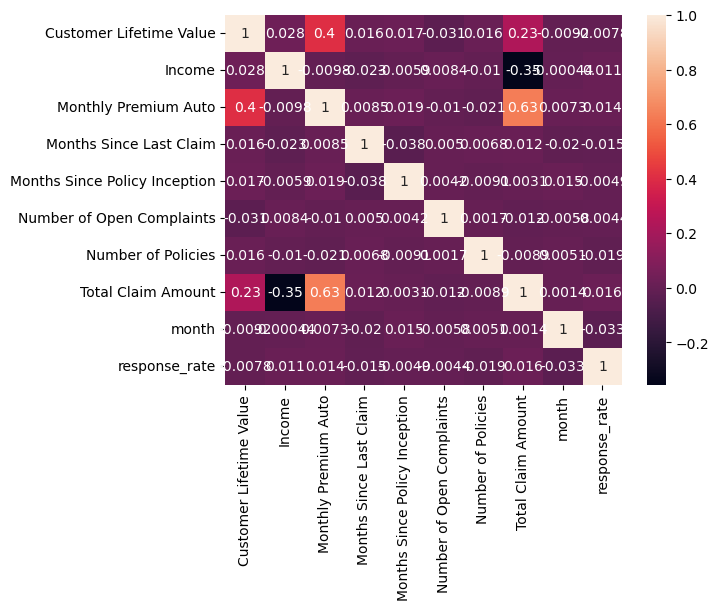

In [121]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Round 5 starts:


In [122]:
#Checking numerical data

numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,month,response_rate
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2,0
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1,0
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,0
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1,1
4,9025.067525,23675,117,14.0,31,0.0,7,707.925645,1,0
...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,14.0,40,0.0,7,1214.400000,1,0
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1,0
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2,0
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2,0


In [123]:
from sklearn.preprocessing import MinMaxScaler 


In [124]:
# Spliting X & y

y = numerical['Total Claim Amount']
X = numerical.drop(['Total Claim Amount'], axis=1)
X_num = X.select_dtypes(include = np.number)


In [126]:
X_num
X_cat = categorical

In [127]:
#Normalizing

transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
x_normalized = pd.DataFrame(x_normalized, columns=X_num.columns)
X_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,10910.0,-1.475065e-16,1.000046,-0.888953,-0.581543,-0.326386,0.141550,10.938228
Income,10910.0,-1.083561e-16,1.000046,-1.236462,-1.236462,-0.122630,0.814106,2.056958
Monthly Premium Auto,10910.0,8.207357e-17,1.000046,-0.934819,-0.731573,-0.296045,0.458871,5.946524
Months Since Last Claim,10910.0,-1.516457e-16,1.000046,-1.541103,-0.825851,-0.110599,0.809011,2.035158
Months Since Policy Inception,10910.0,4.223121e-17,1.000046,-1.721295,-0.862293,-0.003290,0.819920,1.822089
Number of Open Complaints,10910.0,-7.296435e-16,1.000046,-0.406656,-0.406656,-0.406656,-0.406656,5.210736
Number of Policies,10910.0,-4.422480e-17,1.000046,-0.824922,-0.824922,-0.408125,0.425469,2.509455
month,10910.0,-5.386057e-16,1.000046,-0.935529,-0.935529,-0.935529,1.068914,1.068914
response_rate,10910.0,-4.979009e-16,1.000046,-0.393993,-0.393993,-0.393993,-0.393993,2.538113


# Round 6 starts:


In [128]:
#Checking categorical data
categorical

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,M
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [129]:
#One Hot/Label Encoding
from sklearn.preprocessing import OneHotEncoder


In [130]:
X_cat = X_cat.drop (['Customer'], axis=1)
X_cat

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,M
10908,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [131]:
encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.shape

/Users/juan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(10910, 45)

In [132]:
# Concat DataFrames

X = pd.concat([x_normalized, X_cat_encode], axis=1)
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,month,response_rate,State_California,...,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Type_M
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.087527,0.236795,0.236287,0.400000,0.313131,0.0,0.750,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.400000,0.404040,0.0,0.750,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [133]:
#Train-test split.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [134]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8728, 54)
(2182, 54)
(8728,)
(2182,)


In [135]:
X_train.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,month,response_rate,State_California,...,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Type_M
819,0.044500,0.000000,0.067511,0.571429,0.898990,0.0,1.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3828,0.023826,0.763895,0.147679,0.600000,0.818182,0.0,0.000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9692,0.191576,0.000000,0.050633,0.257143,0.949495,0.0,0.125,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
6168,0.053681,0.000000,0.118143,0.714286,0.393939,0.2,0.750,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6485,0.053361,0.739591,0.071730,0.600000,0.767677,0.0,0.875,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [136]:
y_train.head()

819     369.600000
3828    138.423414
9692    350.400000
6168    942.277602
6485    330.872532
Name: Total Claim Amount, dtype: float64

In [137]:
# Apply linear regression.

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [138]:
from sklearn.metrics import r2_score


In [139]:
#R2 Train

predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7695605463545643

In [140]:
#R2 Score

predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7750649585866114

In [141]:
#R2 Score (Other way)

r2 = r2_score(y_test, predictions_test)
r2

0.7750649585866114

In [142]:
y_test[:5]


423       31.707317
3011      30.567357
10097    379.200000
1356     452.599718
2941      19.938981
Name: Total Claim Amount, dtype: float64

In [143]:
predictions_test[:5]

array([-36.13045289,  12.81583617, 466.77579711, 484.89005492,
        66.81097631])

In [144]:
#MSE

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

17738.724391453055

In [145]:
#RMSE

rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

133.18680261742549

In [146]:
y_test.mean()

420.34627259349145

In [147]:
from sklearn.metrics import mean_absolute_error, r2_score


In [148]:
# MAE
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

92.59878799618714


# Round 7 starts:
#Try to improve the linear regression model.


In [ ]:
# Use the concept of multicollinearity and remove insignificant variables
    #As discussed previously in Lab 4, we don't find a big multicollinearity between columns/values

In [ ]:
# use a different method of scaling the numerical variables
    # I'm going to use the StardardScaler in order to see if the model improves

In [66]:

from sklearn.preprocessing import StandardScaler
Standardtransformer = StandardScaler().fit(X_num)
X_standardized = Standardtransformer.transform(X_num)
X_standardized = pd.DataFrame(X_standardized,columns=X_num.columns)


#One Hot/Label Encoding

from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(drop='first').fit(X_cat)
cols = encoder.get_feature_names(input_features=X_cat.columns)
X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

# Concat DataFrames

X = pd.concat([X_standardized, X_cat_encode], axis=1)

#Train-test split.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Apply linear regression.

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

#R2 Score (Other way)

predictions_test = lm.predict(X_test)
r2 = r2_score(y_test, predictions_test)
print(r2)

#MSE

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
print(mse)

#RMSE

rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
print(rmse)

# MAE
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

0.7712006038955558
19360.51658387196
139.14207337779598
95.35710416727774


/Users/juan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Looking in to the results the "Regression accuracy metrics" for both Standard and MinMax Sacaler I can conclude that MinMax Scaler give more better results

#R2 StandardScaler 0,771 
#R2 MinMaxScaler 0,775

#MSE StandardScaler 19360.51658387196
#MSE MinMaxScaler 17738.724391453055

#RMSE StandardScaler 139.14207337779598
#RMSE MinMaxScaler 133.18680261742549

#MAE StandardScaler 95.35710416727774
#MAE MinMaxScaler 92.59878799618714

In [155]:
# use a different ratio of train test split (using MinMax Scaler)

from sklearn.model_selection import train_test_split

train_ratio = 0.9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# Apply linear regression.

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

#R2 Score (Other way)

predictions_test = lm.predict(X_test)
r2 = r2_score(y_test, predictions_test)
print(r2)

#MSE

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
print(mse)

#RMSE

rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
print(rmse)

# MAE
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, predictions_test)
print(mae)



0.7716878388645951
19465.498085225987
139.51880907327867
94.93772675488002


In [ ]:
# After changing the ratio few times I didn't see any major improvements in metrics